<a href="https://colab.research.google.com/github/e19166/e19-4yp-Dynamic-Multi-Dimensional-Resource-Orchestration-in-Kubernetes/blob/main/results/service1_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('service-1-deployment_dataset.csv')
df.head()  # to preview the data


,Timestamp,Service,CPU Request,Memory Request,CPU Limit,Memory Limit,Latency,CPU Usage,Memory Usage
0,2025-05-06T17:04:04.406000,service-1-deployment,0.1,134217728,0.2,268435456,0.004183,0.186712,178962432
1,2025-05-06T17:04:34.483000,service-1-deployment,0.1,134217728,0.2,268435456,0.004181,0.186702,178962432
2,2025-05-06T17:05:04.564000,service-1-deployment,0.1,134217728,0.2,268435456,0.004181,0.186709,179482624
3,2025-05-06T17:05:34.648000,service-1-deployment,0.1,134217728,0.2,268435456,0.004185,0.186709,179482624
4,2025-05-06T17:06:04.726000,service-1-deployment,0.1,134217728,0.2,268435456,0.004185,0.186698,178966528


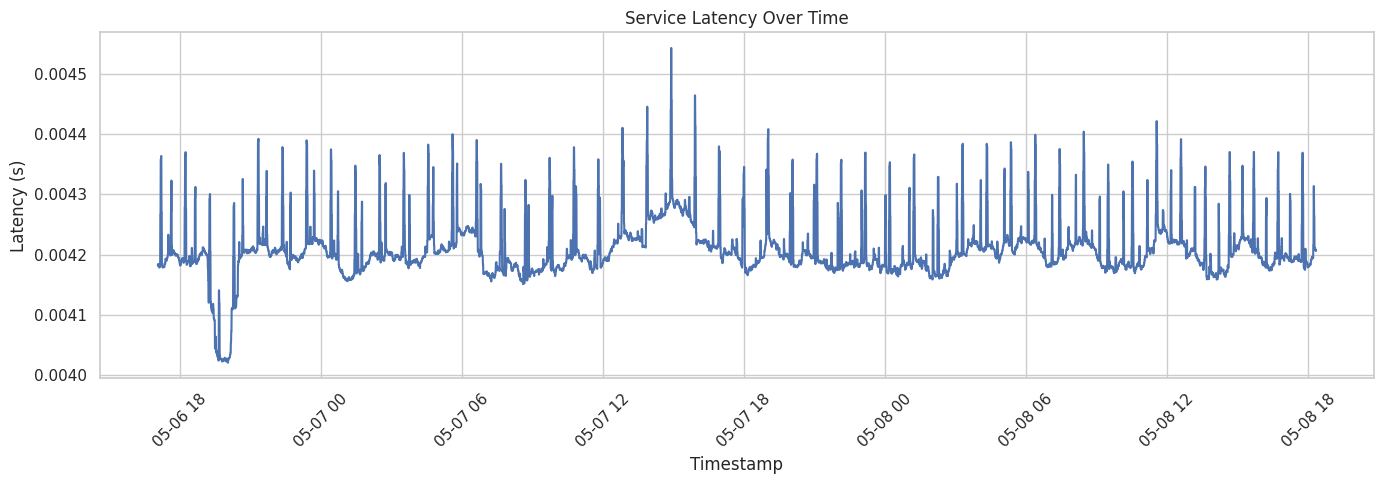

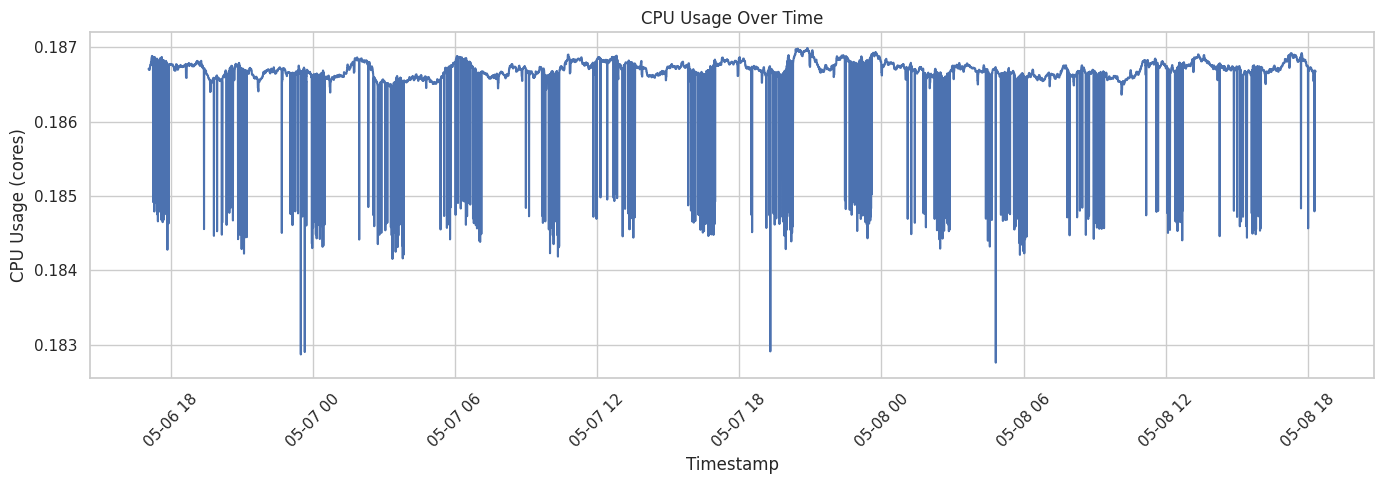

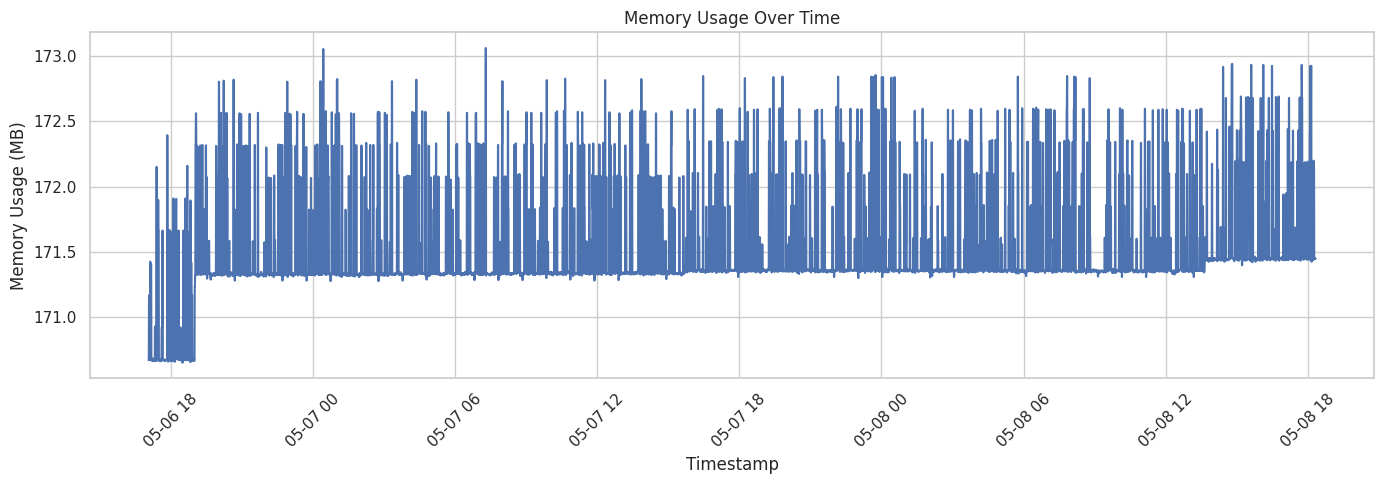

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')


# Set visual style
sns.set(style="whitegrid")

# Plotting functions
def plot_time_series(x, y, ylabel, title):
  plt.figure(figsize=(14, 5))
  sns.lineplot(x=x, y=y)
  plt.ylabel(ylabel)
  plt.xlabel("Timestamp")
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 1. Latency over time
plot_time_series(df['Timestamp'], df['Latency'], 'Latency (s)', 'Service Latency Over Time')

# 2. CPU Usage over time
plot_time_series(df['Timestamp'], df['CPU Usage'], 'CPU Usage (cores)', 'CPU Usage Over Time')

# 3. Memory Usage over time
plot_time_series(df['Timestamp'], df['Memory Usage'] / (1024 ** 2), 'Memory Usage (MB)', 'Memory Usage Over Time')

